## <b> <span style='color:#2ae4f5'>|</span> Rice Variety Classification and Quality Evaluation Using Image Analysis </b> 

        
Rice, as one of the most prevalent grain crops globally, exhibits significant genetic diversity, resulting in various rice varieties. These varieties exhibit variations in essential characteristics such as **texture**, **shape**, and **color**. By harnessing these differentiating features, it becomes possible to accurately classify and assess the quality of rice seeds.

Yatharth is a deep learning project focused on classifying rice breeds using Convolutional Neural Networks (CNN). It leverages computer vision to identify different rice varieties based on their visual characteristics.It aims to **develop a robust image analysis system** capable of automatically identifying and categorizing different rice varieties based on their visual attributes. By employing advanced **machine learning techniques** and **deep neural networks**, the project endeavors to create a model that can accurately classify rice samples into the five target varieties.

In summary, the **Rice Variety Classification and Quality Evaluation project** utilizes a comprehensive dataset of 75,000 rice images to develop a state-of-the-art image analysis system. By accurately classifying and evaluating the quality attributes of five distinct rice varieties, this research aims to enhance rice production processes, support seed selection, and drive advancements in computer vision for agricultural applications. 


## <b>2 <span style='color:#2ae4f5'>|</span> Import Libraries </b> 

In [4]:
# import requirement libraries and tools
import os
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import warnings
warnings.filterwarnings('ignore')

## <b>3 <span style='color:#2ae4f5'>|</span> Create a dataframe with the Images and Label </b> 

In [5]:
# Set the path to the dataset
dataset_path = 'C:/Users/Vedaditya/Desktop/AI&ML/Yatharth- Rice breed classification/Rice_Image_Dataset/Rice_Image_Dataset'

# Initialize empty lists for storing the images and labels
images = []
labels = []

# Loop over the subfolders in the dataset
for subfolder in os.listdir(dataset_path):
    
    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue
  
  # Loop over the images in the subfolder
    for image_filename in os.listdir(subfolder_path):
       # Load the image and store it in the images list
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)
    
        # Store the label for the image in the labels list
        labels.append(subfolder)
 
 # Create a pandas DataFrame from the images and labels
df = pd.DataFrame({'image': images, 'label': labels})

## <b>4 <span style='color:#2ae4f5'>|</span> Visualization of Dataset </b> 

In [6]:
df.head()

,image,label
0,C:/Users/Vedaditya/Desktop/AI&ML/Yatharth- Ric...,Arborio
1,C:/Users/Vedaditya/Desktop/AI&ML/Yatharth- Ric...,Arborio
2,C:/Users/Vedaditya/Desktop/AI&ML/Yatharth- Ric...,Arborio
3,C:/Users/Vedaditya/Desktop/AI&ML/Yatharth- Ric...,Arborio
4,C:/Users/Vedaditya/Desktop/AI&ML/Yatharth- Ric...,Arborio


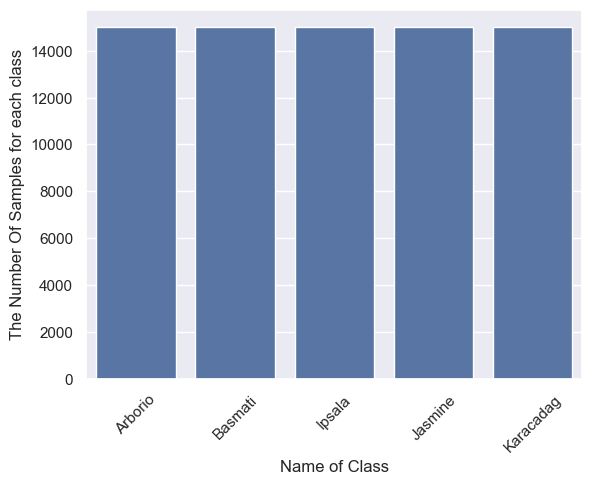

In [7]:
# plot the classes
ax = sns.countplot(x=df.label)

# Set labels and titles
ax.set_xlabel("Name of Class")
ax.set_ylabel("The Number Of Samples for each class")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

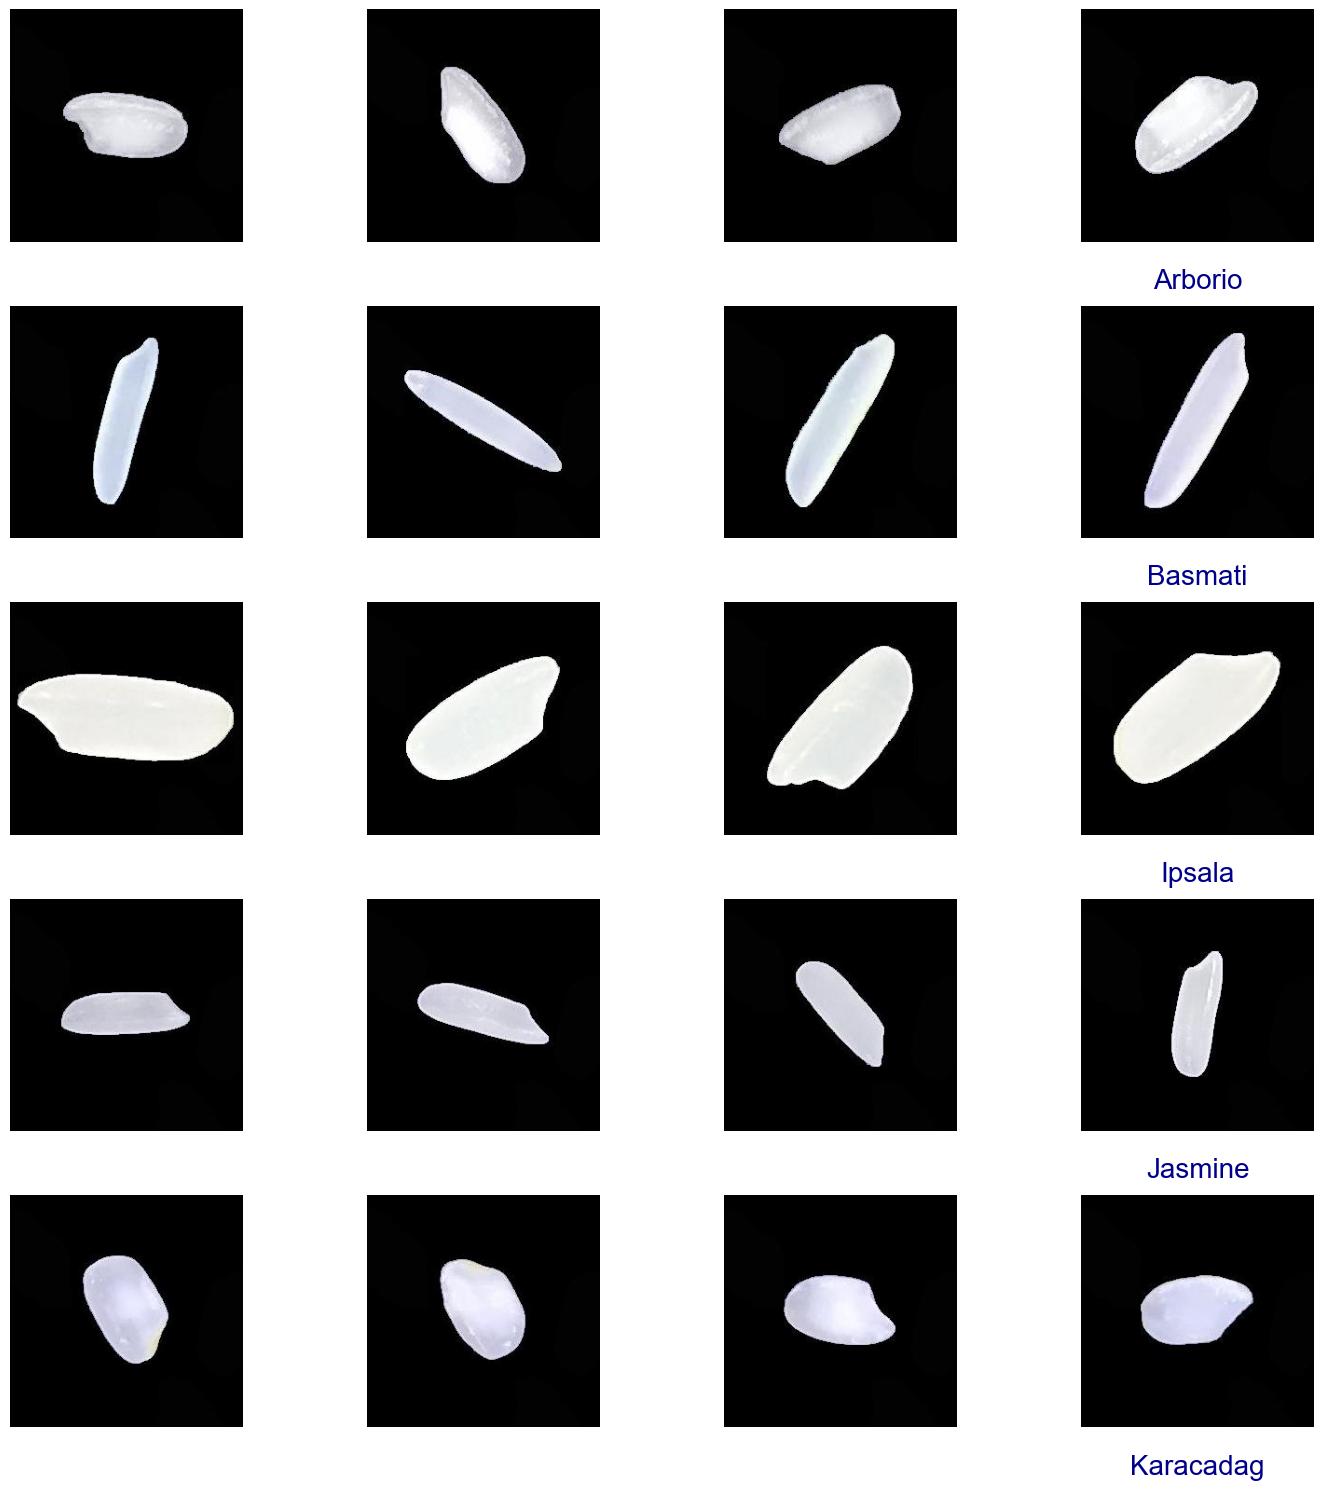

In [8]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

# Create figure and grid of subplots
fig = plt.figure(figsize=(15, 15))
gs = GridSpec(5, 4, figure=fig)

# Loop through each unique category in the DataFrame
for i, category in enumerate(df['label'].unique()):
    # Get the filepaths for the first four images in the category
    filepaths = df[df['label'] == category]['image'].values[:4]
    
    # Loop through the filepaths and add an image to each subplot
    for j, filepath in enumerate(filepaths):
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(plt.imread(filepath))
        ax.axis('off')
    
    # Add a label below the last image of the row
    ax.text(0.5, -0.2, category, fontsize=20, color='darkblue', 
            transform=ax.transAxes, ha='center')

plt.tight_layout()
plt.show()


## <b>5 <span style='color:#2ae4f5'>|</span> Split Data into Train and Test </b> 
**I divided our data into two separate datasets:** the **training dataset** and the **testing dataset**. The training dataset consists of **80%** of the data, while the testing dataset contains the remaining **20%**.
To facilitate the training process, I applied the **LabelEncoder to labels**. This process allowed us to convert the rice types' labels, namely **'Arborio'**, **'Basmati'**, **'Ipsala'**, **'Jasmine'**, and **'Karacadag'**, into numerical values. By assigning integer values to the labels, we enabled the utilization of these labels as target variables during the training of our machine learning model.

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42)

# Create a dataframe for the training data
df_train = pd.DataFrame({'image': X_train, 'label': y_train})

# Create a dataframe for the test data
df_test = pd.DataFrame({'image': X_test, 'label': y_test})

# Encode the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

## <b>6 <span style='color:#2ae4f5'>|</span> Data Augmentation </b> 
To streamline the preprocessing of our images, we took the following steps: 
- **we created generators for both the training and testing datasets.** These generators allow us to efficiently handle and manipulate the data during the training and testing phases.

- **to enhance the diversity and robustness of our training data, we applied data augmentation techniques specifically to the training dataset.** This augmentation process introduces variations in the images by applying transformations such as rotation, scaling, and flipping. By doing so, we expand the dataset and enable our model to learn from a wider range of image variations.

- **Additionally, we standardized the image dimensions by reshaping them to a uniform size of 50x50 pixels.** This resizing ensures that all images in the dataset have consistent dimensions, facilitating the subsequent processing and analysis stages.


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the image size and batch size
image_size = (50, 50)
batch_size = 32

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Create a generator for the training data
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Create a generator for the test data
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 60000 validated image filenames belonging to 5 classes.
Found 15000 validated image filenames belonging to 5 classes.


## <b>6 <span style='color:#2ae4f5'>|</span> Training Model </b> 

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Set the input shape for the model
input_shape = (50, 50, 3)

# Create a Sequential model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='sigmoid', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [19]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# Train the model on the training data
history = model.fit(train_generator,epochs=5,validation_data=test_generator)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 125s 65ms/step - accuracy: 0.5713 - loss: 0.9524 - val_accuracy: 0.8451 - val_loss: 0.3828
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 122s 65ms/step - accuracy: 0.8455 - loss: 0.3834 - val_accuracy: 0.8502 - val_loss: 0.3675
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 121s 65ms/step - accuracy: 0.8943 - loss: 0.2748 - val_accuracy: 0.9213 - val_loss: 0.2072
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 122s 65ms/step - accuracy: 0.9154 - loss: 0.2228 - val_accuracy: 0.9365 - val_loss: 0.1698
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 122s 65ms/step - accuracy: 0.9295 - loss: 0.1909 - val_accuracy: 0.9425 - val_loss: 0.1558


## <b>8 <span style='color:#2ae4f5'>|</span> Evaluate The Model </b> 

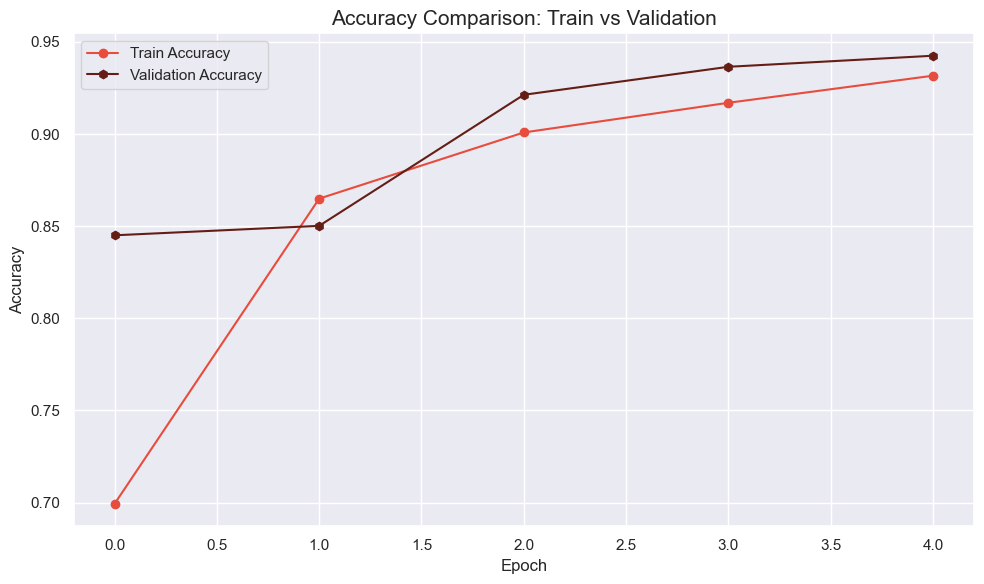

In [21]:
#Accuracy comparison between Validation and Train Data set
import matplotlib.pyplot as plt

# Fix: Extract the actual history dictionary
history_dict = history.history

plt.figure(figsize=(10,6))
plt.plot(history_dict['accuracy'], color="#E74C3C", marker='o', label='Train Accuracy')
plt.plot(history_dict['val_accuracy'], color='#641E16', marker='h', label='Validation Accuracy')
plt.title('Accuracy Comparison: Train vs Validation', fontsize=15)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()



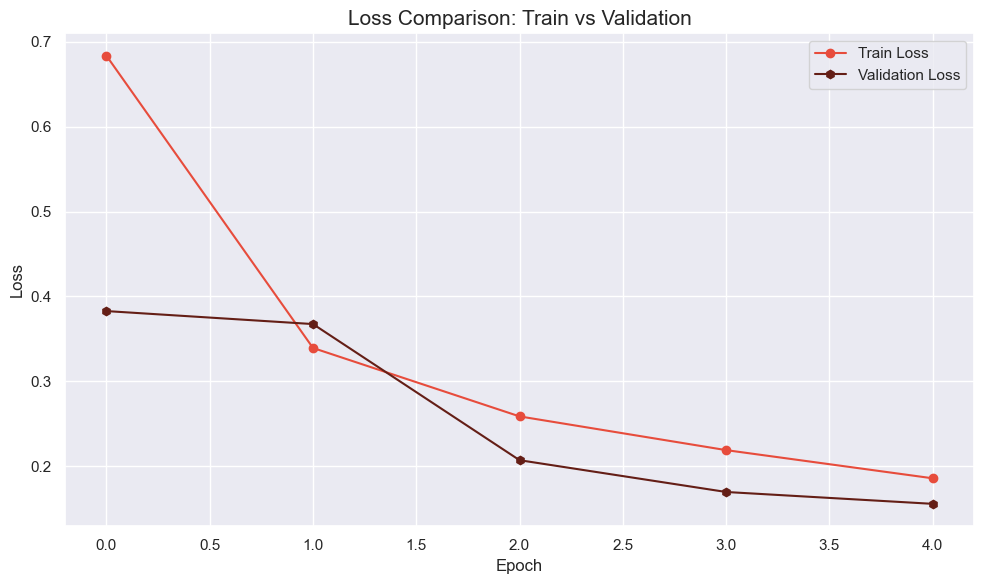

In [22]:
#Loss comparison between Validation and Train Data set

# Fix: Extract the actual history dictionary
history_dict = history.history

plt.figure(figsize=(10,6))
plt.plot(history_dict['loss'], color="#E74C3C", marker='o', label='Train Loss')
plt.plot(history_dict['val_loss'], color='#641E16', marker='h', label='Validation Loss')
plt.title('Loss Comparison: Train vs Validation', fontsize=15)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
# Evaluate the model on the test data
metrics = model.evaluate(test_generator)
# Print the accuracy of the model
print('Accuracy:', metrics[1])

469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.9465 - loss: 0.1477
Accuracy: 0.9452000260353088


## <b>9 <span style='color:#2ae4f5'>|</span> Save The Model </b> 

In [24]:
# Save the model
model.save('CNN_mod.h5')
print ("Model saved successfully!")
#Made with dedication by Priyanshu Mohanty, Ranbeer Singh, Ved Aditya and Aadityavikas Goel
#Thanks to our Mentor- Our Yudhisthir, Shri Shri Gyanaranjan Shial Sir. Pranaam.

Model saved successfully!
